In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("bond_yields_2000_2024.csv")
df.head()

,Date,German 10-Year Government Bond Yields (%),MRO Rate (%),US 10-Year Government Benchmark Bond Yield (%)
0,2000,5.26,4.75,6.03
1,2001,4.80,4.25,5.01
2,2002,4.78,3.25,4.60
3,2003,4.07,2.00,4.00
4,2004,4.04,2.00,4.26


# 1. Plot trends

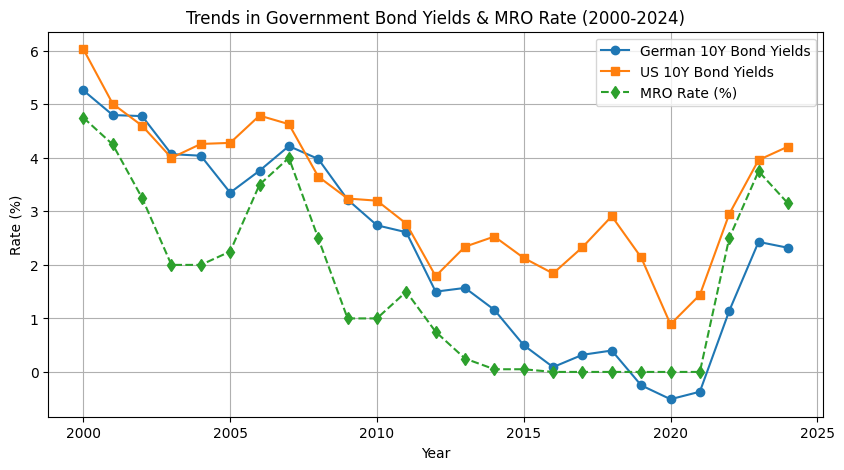

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["German 10-Year Government Bond Yields (%)"], marker='o', label="German 10Y Bond Yields")
plt.plot(df["Date"], df["US 10-Year Government Benchmark Bond Yield (%)"], marker='s', label="US 10Y Bond Yields")
plt.plot(df["Date"], df["MRO Rate (%)"], marker='d', label="MRO Rate (%)", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.title("Trends in Government Bond Yields & MRO Rate (2000-2024)")
plt.legend()
plt.grid()

# 2. Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix of Economic Indicators')

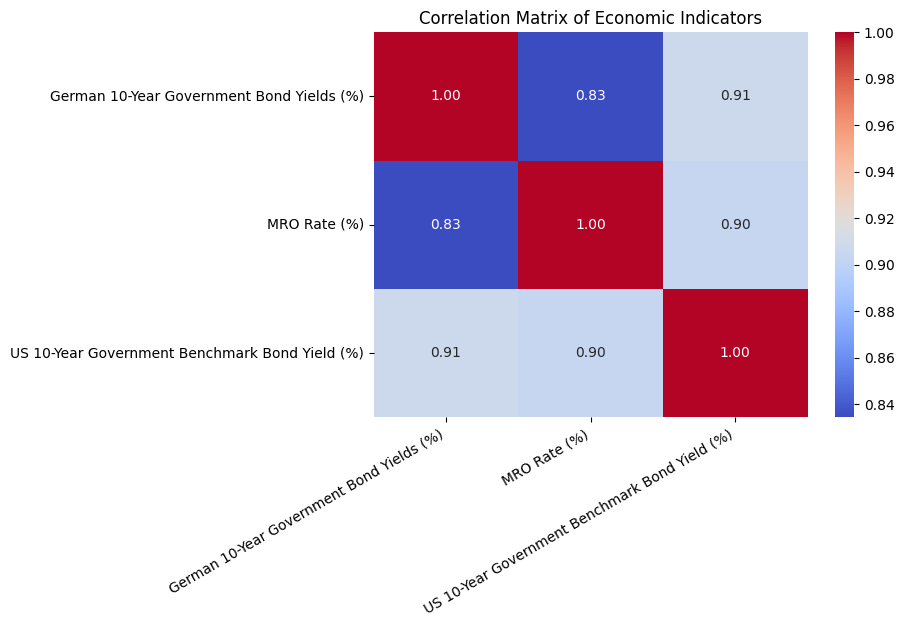

In [10]:
corr_matrix = df.drop(columns=["Date"]).corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=30, ha="right")
plt.title("Correlation Matrix of Economic Indicators")

# 3. Regression Analysis (OLS)

In [15]:
features = df[["MRO Rate (%)", "US 10-Year Government Benchmark Bond Yield (%)"]]
target = df[["German 10-Year Government Bond Yields (%)"]]

features_with_intercept = sm.add_constant(features)
model = sm.OLS(target, features_with_intercept).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     German 10-Year Government Bond Yields (%)   R-squared:                       0.824
Model:                                                   OLS   Adj. R-squared:                  0.808
Method:                                        Least Squares   F-statistic:                     51.40
Date:                                       Tue, 28 Jan 2025   Prob (F-statistic):           5.11e-09
Time:                                               18:32:12   Log-Likelihood:                -28.193
No. Observations:                                         25   AIC:                             62.39
Df Residuals:                                             22   BIC:                             66.04
Df Model:                                                  2                                         
Covariance Type:                                   nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.7540      0.653     -2.686      0.013      -3.108      -0.400
MRO Rate (%)                                       0.0916      0.237      0.386      0.703      -0.400       0.583
US 10-Year Government Benchmark Bond Yield (%)     1.1852      0.297      3.989      0.001       0.569       1.801
==============================================================================
Omnibus:                        4.103   Durbin-Watson:                   0.496
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.513
Skew:                          -0.031   Prob(JB):                        0.469
Kurtosis:                       1.796   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Checking for heteroskedasticity (Breusch-Pagan test)

In [17]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = model.resid
fitted_values = model.fittedvalues

bp_test = het_breuschpagan(residuals, features_with_intercept)
f"Breusch-Pagan Test p-value: {bp_test[1]}"

'Breusch-Pagan Test p-value: 0.9499079961005729'

## p-value is way above 0.05. Therefore, we fail to reject H0 and conclude that heteroskedasticity is not present in the model.